# Import Dataset and Libraries

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=sns.load_dataset('taxis')
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


# Check Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
passengers,6433.0,1.539251,1.203768,0.0,1.00,1.00,2.00,6.00
distance,6433.0,3.024617,3.827867,0.0,0.98,1.64,3.21,36.70
fare,6433.0,13.091073,11.551804,1.0,6.50,9.50,15.00,150.00
tip,6433.0,1.979220,2.448560,0.0,0.00,1.70,2.80,33.20
tolls,6433.0,0.325273,1.415267,0.0,0.00,0.00,0.00,24.02
total,6433.0,18.517794,13.815570,1.3,10.80,14.16,20.30,174.82


# Data Scaling and Handling Missing Value

In [ ]:
df.dropna(inplace=True)

## Detect Outliers

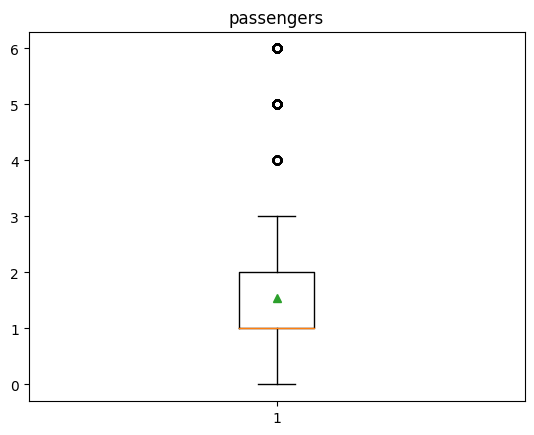

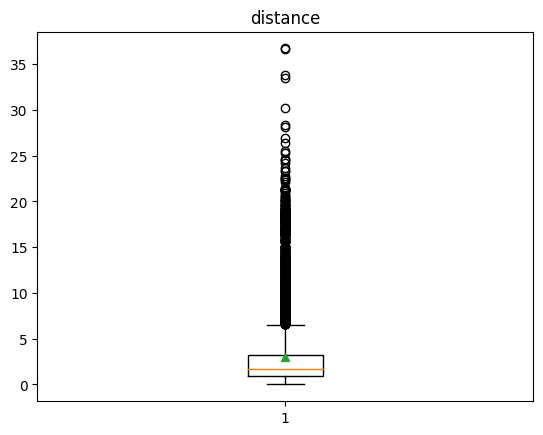

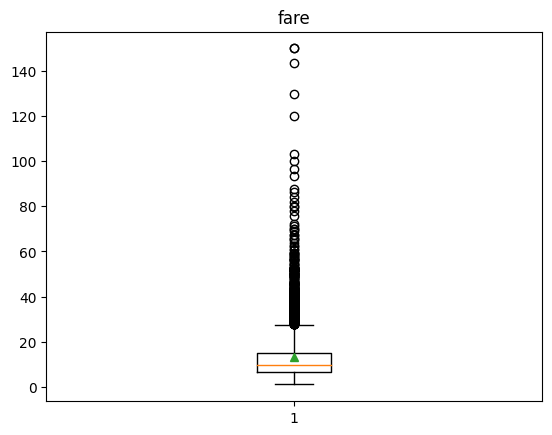

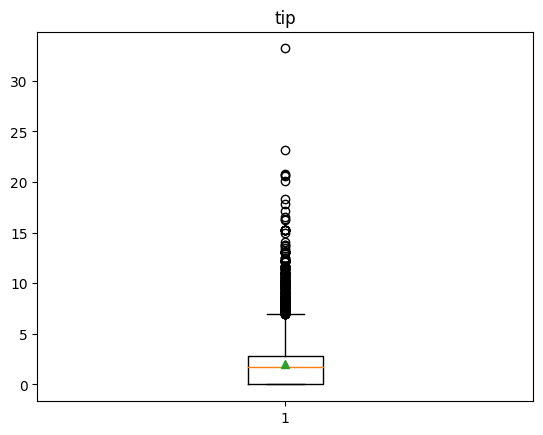

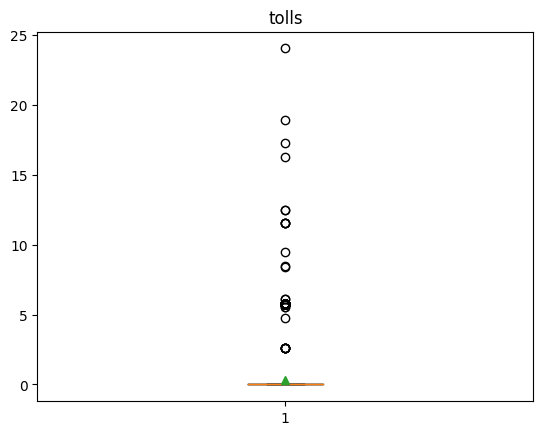

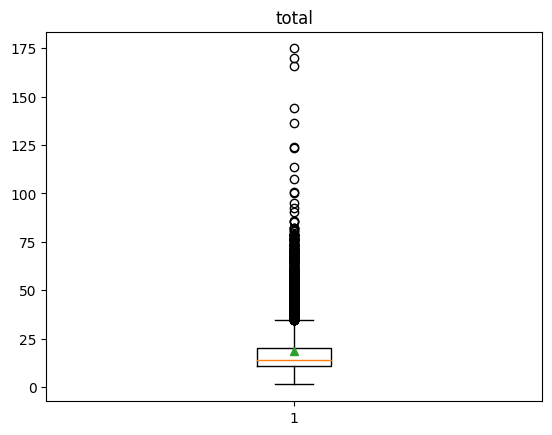

In [ ]:
for col in ['passengers',	'distance'	,'fare'	,'tip'	,'tolls'	,'total']:

  plt.boxplot(df[col], showmeans=True)
  plt.title(f"{col}")
  plt.show()

In [ ]:
# Removie outliers using IQR
def remove_outliers_iqr(df, feature):
    Q1 = np.quantile(df[feature], 0.25)
    Q3 = np.quantile(df[feature], 0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

columns = ['passengers',	'distance'	,'fare'	,'tip'	,'tolls'	,'total']
for col in columns:
  remove_outliers_iqr(df, col)

df.reset_index(inplace=True, drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6341 entries, 0 to 6340
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6341 non-null   datetime64[ns]
 1   dropoff          6341 non-null   datetime64[ns]
 2   passengers       6341 non-null   int64         
 3   distance         6341 non-null   float64       
 4   fare             6341 non-null   float64       
 5   tip              6341 non-null   float64       
 6   tolls            6341 non-null   float64       
 7   total            6341 non-null   float64       
 8   color            6341 non-null   object        
 9   payment          6341 non-null   object        
 10  pickup_zone      6341 non-null   object        
 11  dropoff_zone     6341 non-null   object        
 12  pickup_borough   6341 non-null   object        
 13  dropoff_borough  6341 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

## Check Distributions

array([[<Axes: title={'center': 'pickup'}>,
        <Axes: title={'center': 'dropoff'}>,
        <Axes: title={'center': 'passengers'}>],
       [<Axes: title={'center': 'distance'}>,
        <Axes: title={'center': 'fare'}>,
        <Axes: title={'center': 'tip'}>],
       [<Axes: title={'center': 'tolls'}>,
        <Axes: title={'center': 'total'}>, <Axes: >]], dtype=object)

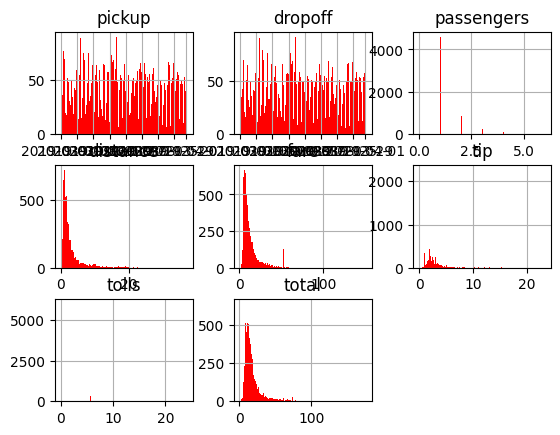

In [ ]:
df.hist(bins=150, color='r')

## Data Scaling

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
for col in df.select_dtypes(['int', 'float']):
  df[col] = scaler.fit_transform(df[[col]])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for col in df.select_dtypes(['int', 'float']):
  df[col] = scaler.fit_transform(df[[col]])
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,-0.450451,-0.375780,-0.549175,0.075071,-0.229932,-0.413941,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,-0.450451,-0.593552,-0.735718,-0.835286,-0.229932,-0.695808,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,-0.450451,-0.437617,-0.502540,0.163990,-0.229932,-0.320500,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,-0.450451,1.264233,1.316252,1.768759,-0.229932,1.439435,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,1.205381,-0.225221,-0.362633,-0.369522,-0.229932,-0.379190,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


## Data Corralation

In [ ]:
df.corr(numeric_only=True)

,passengers,distance,fare,tip,tolls,total
passengers,1.000000,0.009411,0.007637,0.021099,-0.002903,0.015708
distance,0.009411,1.000000,0.920108,0.452589,0.635267,0.904676
fare,0.007637,0.920108,1.000000,0.488612,0.609307,0.974358
tip,0.021099,0.452589,0.488612,1.000000,0.413619,0.646186
tolls,-0.002903,0.635267,0.609307,0.413619,1.000000,0.683142
total,0.015708,0.904676,0.974358,0.646186,0.683142,1.000000


# Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Choosing Features
X = df[['passengers', 'distance', 'fare', 'tip', 'tolls']]
y = df['total']

# Spliting Train & Test Data
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training The Model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
y_pred=model.predict(X_test)

# Mean Squared Error & R2 Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Show result
print(f"\n\nMean Squared Error : {mse}")
print(f"R-squared : {r2}")
print(f"model intercept : {model.intercept_}")
print(f"model coef : {model.coef_}")



Mean Squared Error : 0.0061139401551850775
R-squared : 0.9928824103035198
model intercept : -0.00023670765264818122
model coef : [ 0.00620096 -0.0167029   0.818179    0.21575411  0.10724279]
